## Import Libraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pickle

## Load and explore dataset

In [33]:
csv_file = 'sales_data.csv'
df = pd.read_csv(csv_file)
df.shape

(113036, 7)

### Checking for missing values

In [34]:
df.isnull().sum()

Product        0
Region         0
Sales          0
Profit         0
Discount(%)    0
Category       0
Date           0
dtype: int64

There are no null values in the dataset

### Checking type of data present in the dataset

In [35]:
df.dtypes

Product         object
Region          object
Sales            int64
Profit           int64
Discount(%)    float64
Category        object
Date            object
dtype: object

## Cleaning Data

### Removing duplicates

In [36]:
df.drop_duplicates(inplace=True)
df.shape

(110598, 7)

The numbers of rows changed from 113036 to 110598 indicating that there were duplicate values in the dataset and they were removed

### Converting data in date column to datetime data type

In [37]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Product,Region,Sales,Profit,Discount(%),Category,Date
0,Hitch Rack - 4-Bike,Canada,8,590,1.04,Bike Racks,2013-11-26
1,Hitch Rack - 4-Bike,Canada,8,590,1.04,Bike Racks,2015-11-26
2,Hitch Rack - 4-Bike,Australia,23,1366,13.01,Bike Racks,2014-03-23
3,Hitch Rack - 4-Bike,Australia,20,1188,13.00,Bike Racks,2016-03-23
4,Hitch Rack - 4-Bike,Australia,4,238,12.92,Bike Racks,2014-05-15


## Exploratory data analysis

### Plotting time series graph to observe trend in sales over time

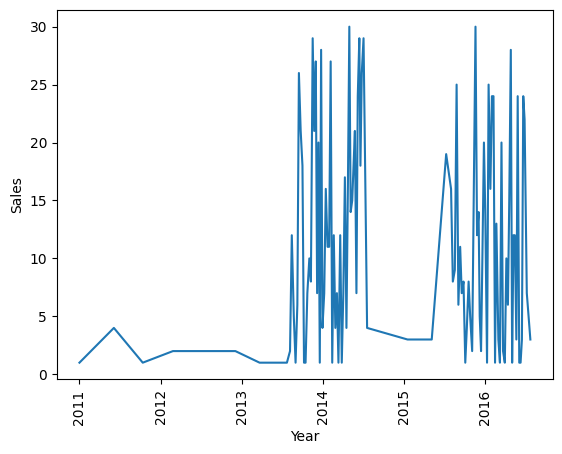

In [42]:
step = 1000
df = df.sort_values('Date',ascending=True)
plt.plot(df['Date'][::step],df['Sales'][::step])
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

The graph shows that sales were low until the midlle of the year 2013-2014. The sales improved in the middle of the year 2013-2014 and in the middle of the year 2015-2016. Sales dropped from the middle of the year 2014-2015 and remained low until the middle of the year 2015-2016.

### Plotting scatterplot to undersatnd relationship between profit and discount

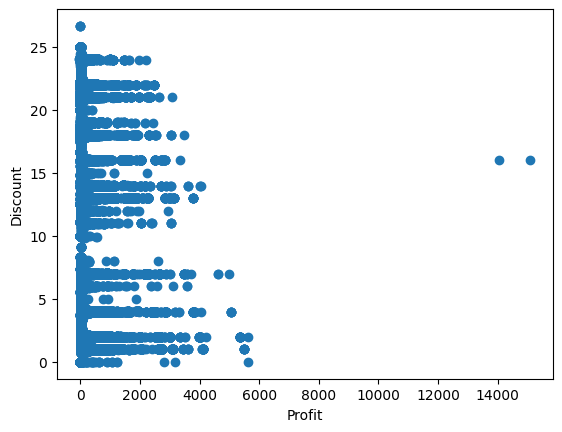

In [43]:
plt.scatter(df['Profit'],df['Discount(%)'])
plt.xlabel('Profit')
plt.ylabel('Discount')
plt.show()

The scatter plot shows that there may be outliers in profit and discount values. It also shows that there is no linear relationship between profit and discount.

### Plotting barchart to visualize sales distribution by Region and Category

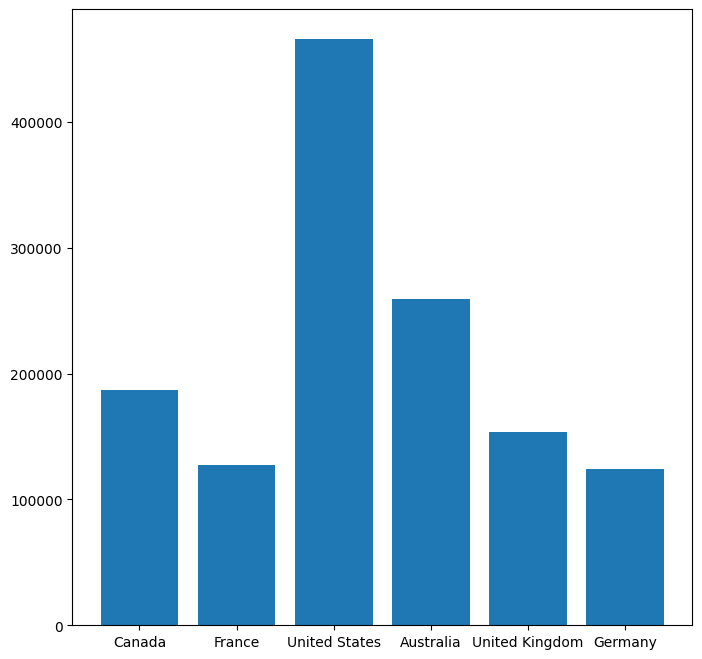

In [93]:
#Barchart between sales and region
regions = df['Region'].unique()
sales_by_region = []
for i in regions:
    sales = 0
    indices = np.where(df['Region'] == i)[0]
    for j in indices:
        sales += df['Sales'].iloc[j]
    sales_by_region.append(sales)
plt.figure(figsize=(8,8))
plt.bar(regions,sales_by_region)
plt.show()

The bar graph shows that the most sales are made in the US. The second most sales are made in Australia and the third most sales are made in Canada. The number of sales made in France and Germany are same and it is close to the sales made in UK.

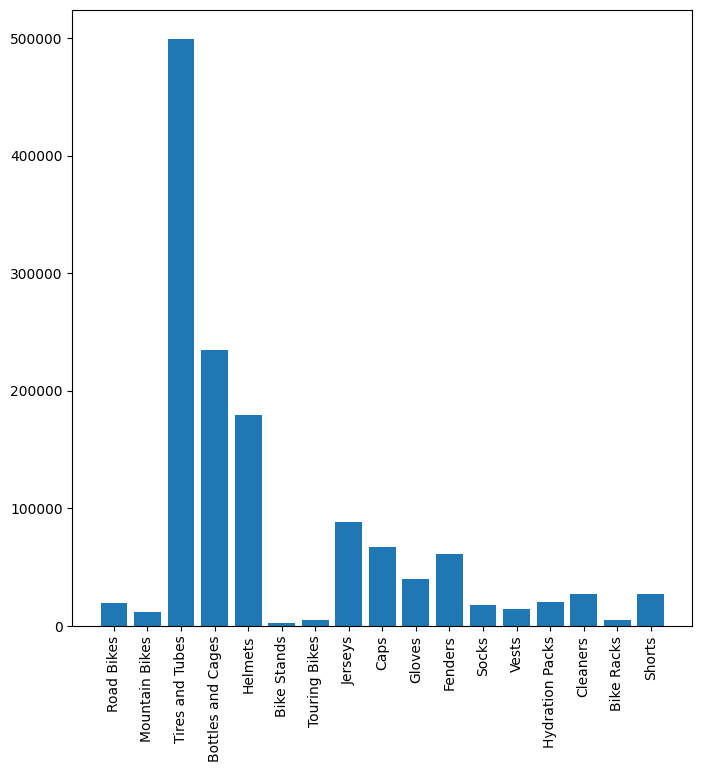

In [95]:
#Barchart between sales and region
categories = df['Category'].unique()
sales_by_category = []
for i in categories:
    sales = 0
    indices = np.where(df['Category'] == i)[0]
    for j in indices:
        sales += df['Sales'].iloc[j]
    sales_by_category.append(sales)
plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar(categories,sales_by_category)
plt.show()

The above barchart shows that the products belonging to the categories tires and tubes, bottles and cages, and helmets are the most bought products and the products belonging to the categories bike stands, touring bikes and bike racks are the least bought products.

## Training a Linear Regression model

In [111]:
#Splitting dataset into training data and testing data
features = df[['Profit','Discount(%)']]
target = df['Sales']
model = LinearRegression().fit(features.values,target.values)

In [112]:
#Using model to prdict sales for a sample value
sales = model.predict([[590,1.04]])
print(sales)

[10.85336232]


In [120]:
#Saving the model
filename = 'sales_predictor.sav'
with open(filename,'wb') as file:
    pickle.dump(model,file)